In [2]:
# libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import renom as rm
from renom import Sequential
from renom import Dense, Relu
from renom import Adam

/Users/toshio/ReNom/renom/cuda/__init__.py:12: UserWarning: Couldn't find cuda modules. No module named 'renom.cuda.cuda_base'
  warnings.warn("Couldn't find cuda modules. %s" % e)
/Users/toshio/ReNom/renom/cuda/__init__.py:29: UserWarning: Couldn't find cuda modules.
  warnings.warn("Couldn't find cuda modules.")


In [3]:
df=pd.read_csv('../dataset/train_data1.csv')

In [4]:
df=df.drop(['air_store_id','reserve_visitors','diff_day'],axis=1)

In [5]:
df1=df.dropna()
df1.set_index('store_id_date',drop=True,inplace=True)

In [6]:
print(df1.shape)
df1.head()

(35698, 33)


,visitors,year,month,day,season,day_of_week,working_day,holiday_flg,air_genre_name,air_area_name,...,max_working_day,max_holiday_flg,max_season,median_year,median_month,median_day,median_day_of_week,median_working_day,median_holiday_flg,median_season
store_id_date,,,,,,,,,,,,,,,,,,,,,
air_00a91d42b08b08d9_2016-07-01,35.0,0,7,1,2,5,0,0,6,44,...,54.0,99.0,53.0,29.0,32.0,26.0,38.0,33.0,29.0,34.5
air_00a91d42b08b08d9_2016-07-06,29.0,0,7,6,2,3,0,0,6,44,...,54.0,99.0,53.0,29.0,32.0,32.5,28.0,33.0,29.0,34.5
air_00a91d42b08b08d9_2016-07-08,42.0,0,7,8,2,5,0,0,6,44,...,54.0,99.0,53.0,29.0,32.0,35.0,38.0,33.0,29.0,34.5
air_00a91d42b08b08d9_2016-07-09,11.0,0,7,9,2,6,1,0,6,44,...,99.0,99.0,53.0,29.0,32.0,26.0,11.0,11.0,29.0,34.5
air_00a91d42b08b08d9_2016-07-13,36.0,0,7,13,2,3,0,0,6,44,...,54.0,99.0,53.0,29.0,32.0,36.0,28.0,33.0,29.0,34.5


In [7]:
df_s = df1.copy()

col_std=[]
col_mean=[]
for col in df1.columns:
    v_std = df1[col].std()
    v_mean = df1[col].mean()
    col_std.append(v_std)
    col_mean.append(v_mean)
    df_s[col] = (df_s[col] - v_mean) / v_std

df_s.head()

,visitors,year,month,day,season,day_of_week,working_day,holiday_flg,air_genre_name,air_area_name,...,max_working_day,max_holiday_flg,max_season,median_year,median_month,median_day,median_day_of_week,median_working_day,median_holiday_flg,median_season
store_id_date,,,,,,,,,,,,,,,,,,,,,
air_00a91d42b08b08d9_2016-07-01,0.444620,-0.879254,0.319528,-1.726220,0.883689,0.787190,-0.648738,-0.237162,-0.270674,0.13951,...,-0.319018,0.915679,-0.241928,0.309807,0.514231,0.009577,0.869205,0.574764,0.313014,0.769996
air_00a91d42b08b08d9_2016-07-06,0.117368,-0.879254,0.319528,-1.145115,0.883689,-0.218504,-0.648738,-0.237162,-0.270674,0.13951,...,-0.319018,0.915679,-0.241928,0.309807,0.514231,0.489026,0.159721,0.574764,0.313014,0.769996
air_00a91d42b08b08d9_2016-07-08,0.826415,-0.879254,0.319528,-0.912673,0.883689,0.787190,-0.648738,-0.237162,-0.270674,0.13951,...,-0.319018,0.915679,-0.241928,0.309807,0.514231,0.673429,0.869205,0.574764,0.313014,0.769996
air_00a91d42b08b08d9_2016-07-09,-0.864389,-0.879254,0.319528,-0.796452,0.883689,1.290038,1.541412,-0.237162,-0.270674,0.13951,...,1.090530,0.915679,-0.241928,0.309807,0.514231,0.009577,-1.046404,-1.122168,0.313014,0.769996
air_00a91d42b08b08d9_2016-07-13,0.499163,-0.879254,0.319528,-0.331568,0.883689,-0.218504,-0.648738,-0.237162,-0.270674,0.13951,...,-0.319018,0.915679,-0.241928,0.309807,0.514231,0.747190,0.159721,0.574764,0.313014,0.769996


In [8]:
df_s.shape

(35698, 33)

In [9]:
X, y = np.array(df_s.iloc[:, 1:33]), np.array(df_s.iloc[:, 0:1])

#データをわける
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 666)

/Users/toshio/.pyenv/versions/anaconda3-4.3.0/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [10]:
sequential = Sequential([
    Dense(10),
    Relu(),
    Dense(8),
    Relu(),
    Dense(4),
    Relu(),
    Dense(1)
])

In [11]:
# parameters
BATCH = 10
EPOCH = 100
optimizer = Adam(lr=0.01)

# Learning curves
learning_curve = []
test_curve = []

# Training loop
for i in range(1, 1+EPOCH):
    N = X_train.shape[0] # Number of records in training data
    perm = np.random.permutation(N)
    train_loss = 0

    for j in range(N//BATCH):
        # Make mini-batch
        index = perm[j*BATCH:(j+1)*BATCH]
        train_batch_x = X_train[index]
        train_batch_y = y_train[index]

        # Forward propagation
        with sequential.train():
            z = sequential(train_batch_x)
            loss = rm.mean_squared_error(z, train_batch_y)

        # Backpropagation
        grad = loss.grad()

        # Update
        grad.update(optimizer)

        train_loss += loss.as_ndarray()

    # calculate mean squared error for training data
    train_loss = train_loss / (N // BATCH)
    learning_curve.append(train_loss)

    # calculate mean squared error for testidation data
    y_test_pred = sequential(X_test)
    test_loss = rm.mean_squared_error(y_test_pred, y_test).as_ndarray()
    test_curve.append(test_loss)

    # print training progress
    if i % 10== 0:
        print("Epoch %d - loss: %f - test_loss: %f" % (i, train_loss, test_loss))

print('Finished!')

Epoch 10 - loss: 0.141239 - test_loss: 0.129741
Epoch 20 - loss: 0.133032 - test_loss: 0.137912
Epoch 30 - loss: 0.131452 - test_loss: 0.125697
Epoch 40 - loss: 0.130222 - test_loss: 0.137213
Epoch 50 - loss: 0.129823 - test_loss: 0.133017
Epoch 60 - loss: 0.129012 - test_loss: 0.161287
Epoch 70 - loss: 0.126518 - test_loss: 0.131171
Epoch 80 - loss: 0.125171 - test_loss: 0.123055
Epoch 90 - loss: 0.125926 - test_loss: 0.139877
Epoch 100 - loss: 0.127448 - test_loss: 0.136467
Finished!


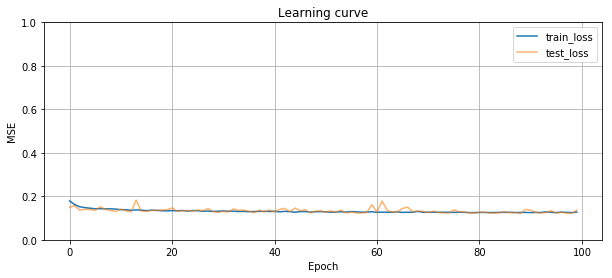

In [12]:
plt.figure(figsize=(10, 4))
plt.plot(learning_curve, label='train_loss')
plt.plot(test_curve, label='test_loss', alpha=0.6)
plt.title('Learning curve')
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.ylim(0, 1)
plt.legend()
plt.grid()

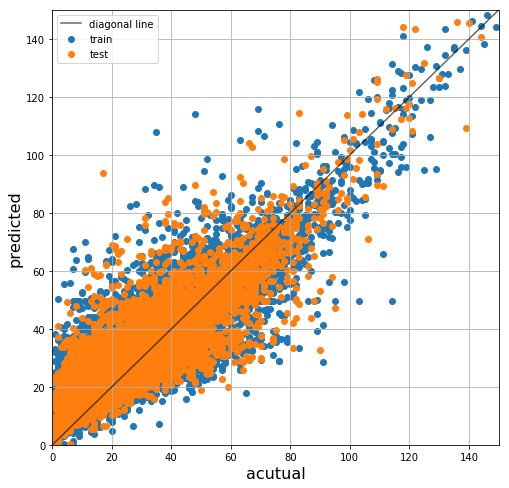

In [13]:
# predict test value
y_train_pred = sequential(X_train)
y_test_pred = sequential(X_test)

train_true = y_train[:,:1].reshape(-1, 1) * col_std[0] + col_mean[0]
train_pred = y_train_pred[:,:1] * col_std[0] + col_mean[0]
test_true = y_test[:,:1].reshape(-1, 1) * col_std[0] + col_mean[0]
test_pred = y_test_pred[:,:1] * col_std[0] + col_mean[0]

u_lim=150
l_lim=0
plt.figure(figsize=(8, 8))
plt.plot([l_lim,u_lim], [l_lim,u_lim], c='k', alpha=0.6, label = 'diagonal line') # diagonal line
plt.scatter(train_true,train_pred,label='train')
plt.scatter(test_true,test_pred,label='test')
plt.xlim(l_lim,u_lim)
plt.ylim(l_lim,u_lim)
plt.xlabel('acutual', fontsize=16)
plt.ylabel('predicted', fontsize=16)
plt.legend()
plt.grid()
plt.show()

In [14]:
print("Root mean squared error:{}".format(np.sqrt(rm.mse(test_true,test_pred))))

Root mean squared error:6.773015022277832


In [15]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,y_test_pred))
print(mean_squared_error(y_train,y_train_pred))

0.272933561098
0.261834173813


In [23]:
from sklearn.metrics import r2_score
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

0.737478671345
0.728696557085


In [26]:
import pickle
sequential.save("nn.h5")
with open('nn.pickle', mode='wb') as f:
    pickle.dump(sequential, f)